# HW 4: Text Classification
### COSC 426: Fall 2025, Colgate University

Use this notebook to answer questions and load + display from your experiments. Feel free to add as many code and markdown chunks as you would like in each of the sub-sections. 

**If you use any external resources (e.g., code snippets, reference articles), please cite them in comments or text!**

## Part 1: Train and evaluate `distilgpt` based Bayesian Classifier

In this part, load in the probability estimates from your finetuned **language models**, use it to classify text, and display classification results. 

We want to calculate the probability of text given its class(likelihood), so we want to finetune two separate models, one trained on only the positive sentiment text, and the other trained on only the negative sentiment text. 

For the train configuration, we will use minimal pair comparison mode with `loadPretrained` set to `true`(or not specified since it is true by default) since we want to finetune the distilgpt model. 

The training/validation data split will be 8:2.
Also, since we want to train 2 separate models, we will have 2 diffrent pairs of train-val datasets one with positive reviews and another with negative reviews. 

The preprocessed training/validation data will be in the format of 

| text |
| :-------: |
| `review` |
| ... |

Since we want to calcualte the probability of text given class, 
we need to evaluate positive and negative reviews separately, each evaluated by corresponding model(negative review with negative review model and vice versa).
So we need to separate the `test` set into `positive_test` and `negative_test` sets and run the evaluation separately. 

| sentid | pairid | comparison | sentence |
| :-------: | :------: | :-------: | :-------: | 
| 0 | 0 | expected | `review` |
| 0 | 0 | expected | `review` |
| ... | ... | ... | ... |

Finally, we can load the results & aggreate the accuracy of the model to get the combined model's likelihood.

### Train & Val Data Generation

In [27]:
import os 

nf = "./aclImdb/train/neg"
ntfs = [f"{nf}/{path}" for path in os.listdir(nf)[:2500]]  # negative train files
nvfs = [f"{nf}/{path}" for path in os.listdir(nf)[2500:3000]]  # negative val files

pf = "./aclImdb/train/pos"
ptfs = [f"{pf}/{path}" for path in os.listdir(pf)[:2500]]  # positive train files
pvfs = [f"{pf}/{path}" for path in os.listdir(pf)[2500:3000]]  # positive val files

In [28]:
import csv
def txts2tsv(paths: list[str], savefpath: str) -> None:
    """Generates a tsv file consisted of the frist line of each file

    Args:
        paths (list[str]): paths of source files
        savefpath (str): save path
    """
    rows = [['text']]
    for path in paths:
        with open(path, 'r') as f:
            rows.append([f.readline()])

    with open(savefpath, "w", newline="") as f:
        fw = csv.writer(f)
        fw.writerows(rows)

In [29]:
t = {
    'data/neg_train.tsv': ntfs,
    'data/neg_val.tsv': nvfs,
    'data/pos_train.tsv': ptfs,
    'data/pos_val.tsv': pvfs
    }

for savefpath, paths in t.items():
    txts2tsv(paths, savefpath)

### Eval Dataset Genration

In [33]:
nef = "./aclImdb/test/neg"
nefs = [f"{nef}/{path}" for path in os.listdir(nef)[:1000]]  # negative eval files

pef = "./aclImdb/test/pos"
pefs = [f"{pef}/{path}" for path in os.listdir(pef)[:1000]]  # positive eval files

In [35]:
e = {
    'data/neg_eval.tsv': nefs,
    'data/pos_eval.tsv': pefs
    }

for savefpath, paths in e.items():
    rows = [['sentid', 'pairid', 'comparison', 'sentence']]
    for path in paths:    
        with open(path, 'r') as f:
            rows.append([0, 0, 'expected', f.readline()])
    
    with open(savefpath, 'w') as f:
        fw = csv.writer(f, delimiter='\t')
        fw.writerows(rows)
        

In [46]:
import pandas as pd 

ndf = pd.read_csv('predictions/neg_predictions.tsv', sep='\t')
pdf = pd.read_csv('predictions/pos_predictions.tsv', sep='\t')
df = pd.concat([ndf, pdf], ignore_index=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x11286a5d0>,
 'caps': [<matplotlib.lines.Line2D at 0x11286a850>,
 'boxes': [<matplotlib.lines.Line2D at 0x1127a2350>],
 'medians': [<matplotlib.lines.Line2D at 0x11286aad0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1127a3d90>],
 'means': []}

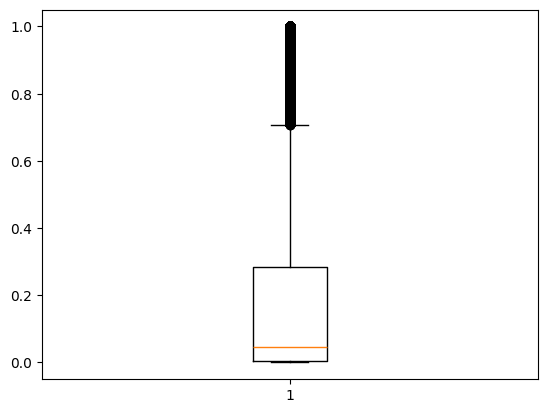

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(df['prob'])

In [69]:
print("=" * 40)
likelihood = df['prob'].mean()
print(f"Overall Likeliehood: {likelihood:.3f}")

prior = 1/len(['pos', 'neg'])
print(f"Assumed Prior: {prior:.1f}")
print("=" * 40)

Overall Likeliehood: 0.209
Assumed Prior: 0.5


In general, p(class|text) ∝ likelihood * prior. However, since we assume uniform prior, it does not affect the proportionality, and the likelihood becomes the only factor that affects the result. The likelihood of 0.21 is good since if the model knew nothing and simply guessed the next word ranomly, the probability of getting it correct is 1/vocab-size which would be fairly small. 


## Part 2: Train and evaluate a `distilgpt` based TextClassification model
In this part, load in and display the results from your finetuned **TextClassification models**. 

## Part 3: Reflect on the two approaches to classification

In this part, answer the question in `HW4.md` in markdown chunks. If you used external sources to find and make sense of this, please cite them!

## Part 4 (Optional): Error analysis comparing the two approaches to classification

In this part, include the results from your experiments (if you choose to attempt this)